In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [2]:
train_dir = "archive/casting_data/casting_data/train/"
test_dir = "archive/casting_data/casting_data/test/"


In [3]:
def create_data_generators(train_dir, test_dir, batch_size=32, image_size=(64, 64)): #Augmentation of images 
    datagen = ImageDataGenerator(rescale=1.0/255, 
                                 zoom_range=0.2,
                                 shear_range=0.2,
                                 horizontal_flip=True)
    
    train_generator = datagen.flow_from_directory(
        directory=train_dir,
        target_size=image_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode="binary",
        shuffle=True)
    
    test_generator = datagen.flow_from_directory(
        directory=test_dir,
        target_size=image_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode="binary",
        shuffle=False)
    
    return train_generator, test_generator

train_generator, test_generator = create_data_generators(train_dir, test_dir)


Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


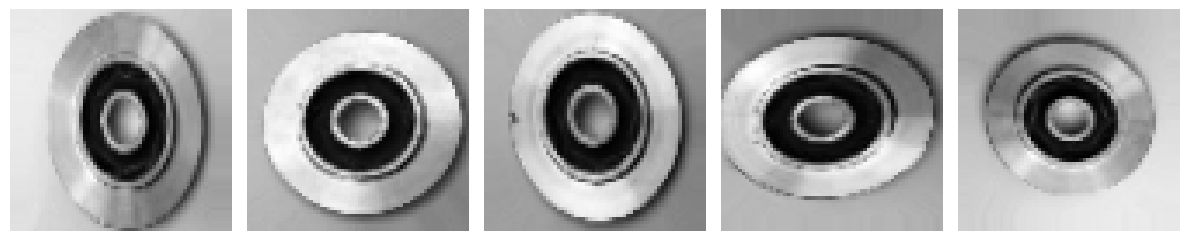

In [4]:
def visualize_samples(generator, num_images=5):
    x_batch, y_batch = next(generator)
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(x_batch[i].reshape(64, 64), cmap="gray")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

visualize_samples(train_generator)


In [5]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Prevent overfitting by dropping 50% of nodes 

model.add(Dense(1, activation='sigmoid'))  # for binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 682,753 (2.60 MB)

 Trainable params: 682,753 (2.60 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(train_generator, 
                    validation_data=test_generator, 
                    epochs=10)


Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


208/208 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.5631 - loss: 0.6877 - val_accuracy: 0.7357 - val_loss: 0.5521
Epoch 2/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.7327 - loss: 0.5272 - val_accuracy: 0.8503 - val_loss: 0.3238
Epoch 3/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.8514 - loss: 0.3508 - val_accuracy: 0.8531 - val_loss: 0.3187
Epoch 4/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.8909 - loss: 0.2598 - val_accuracy: 0.9552 - val_loss: 0.1479
Epoch 5/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.9297 - loss: 0.1874 - val_accuracy: 0.9552 - val_loss: 0.1207
Epoch 6/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.9407 - loss: 0.1589 - val_accuracy: 0.9762 - val_loss: 0.0897
Epoch 7/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.9509 - loss: 0.1382 - val_accuracy: 0.8937 - val_loss: 0.2526
Epoch 8/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.9431 - loss: 0.1727 - val_accuracy: 0.965

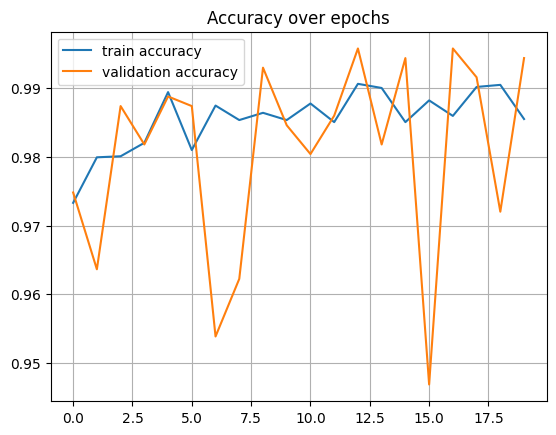

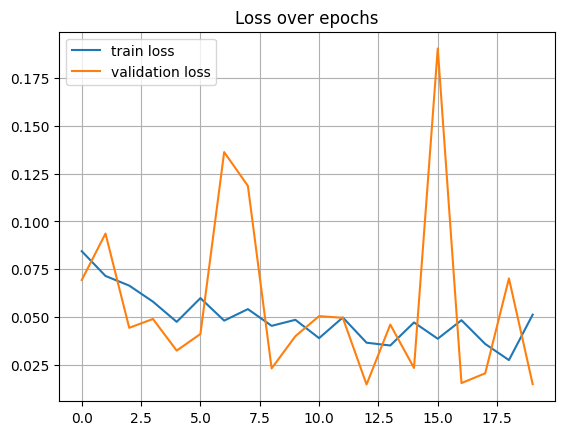

In [41]:
plt.plot(history.history['accuracy'], label='test accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy over epochs')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='test loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Loss over epochs')
plt.legend()
plt.grid(True)
plt.show()


In [42]:
train_loss, train_accuracy = model.evaluate(train_generator)
test_loss, test_accuracy = model.evaluate(test_generator)

print(f'Test accuracy: {test_accuracy} Test loss: {test_loss}')

208/208 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9947 - loss: 0.0213
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9937 - loss: 0.0245
Test accuracy: 0.9958041906356812 Test loss: 0.017858384177088737
